<a href="https://colab.research.google.com/github/KarlaPin/proyectos-2021-club_6_5/blob/main/para_graficar_boxplot_y_swa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statannot #tiene que darle play a todo para que se ejecute cada parte del codigo

In [ ]:
from google.colab import files
import pandas as pd
file = files.upload()
data = pd.read_excel("Gráficas.xlsx") # en este codigo puedes seleccionar el archivo que quieres graficar, los datos necesitan estar en una sola columna,
              # y en la siguiente columna el nombre del grupo al que pertencen esos datos, puedes tener varias hojas para diferentes graficas y se haran todas las hojas en graficas diferentes con el titulo de cada grafica por el nombre de la hoja

Saving Gráficas.xlsx to Gráficas (1).xlsx


In [ ]:
xls = pd.ExcelFile('Gráficas.xlsx')
sheet_to_df_map = {}
for sheet_name in xls.sheet_names:
    sheet_to_df_map[sheet_name] = xls.parse(sheet_name)

In [ ]:
for datos in sheet_to_df_map:
  print(datos)#vemos los nombres de las hojas en tu archivo de excel

Ruido Frecuencia Baja
Ruido Frecuencia Alta
Ruido Frecuencia Media


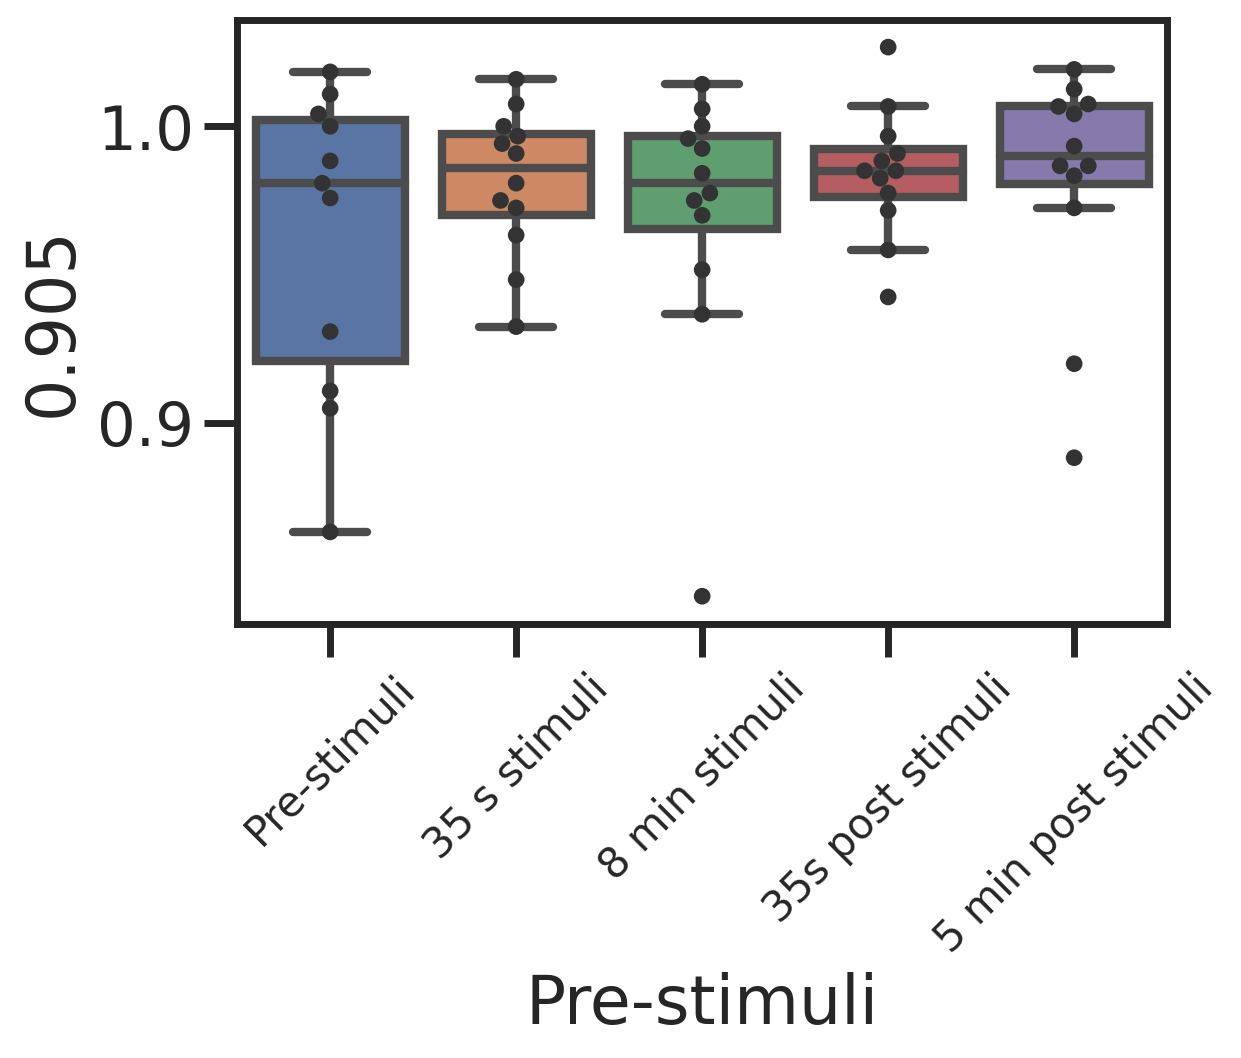

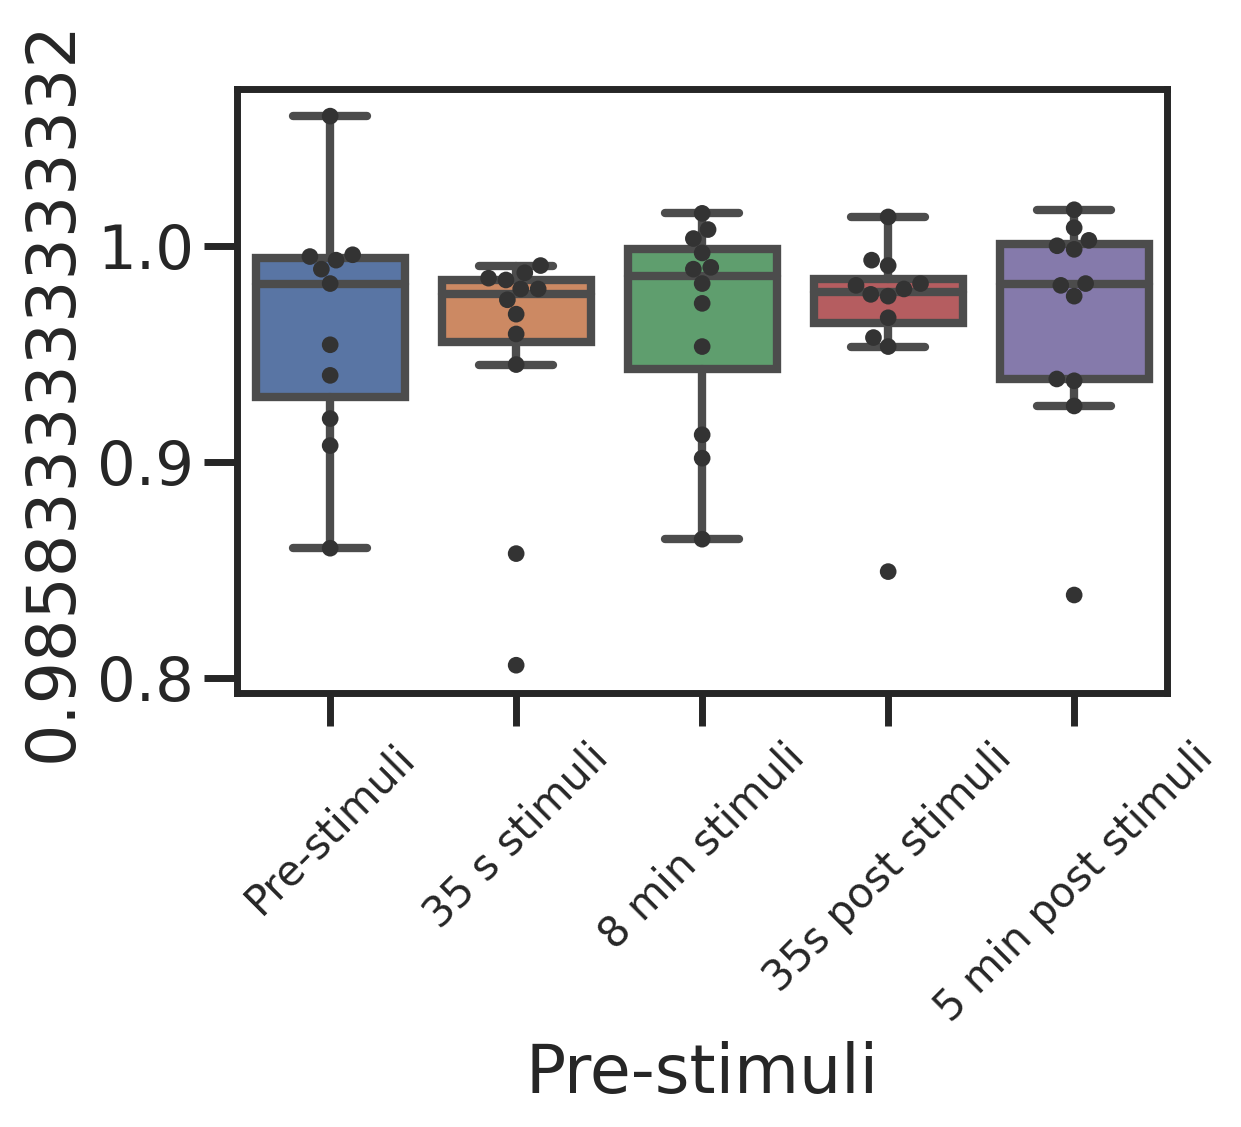

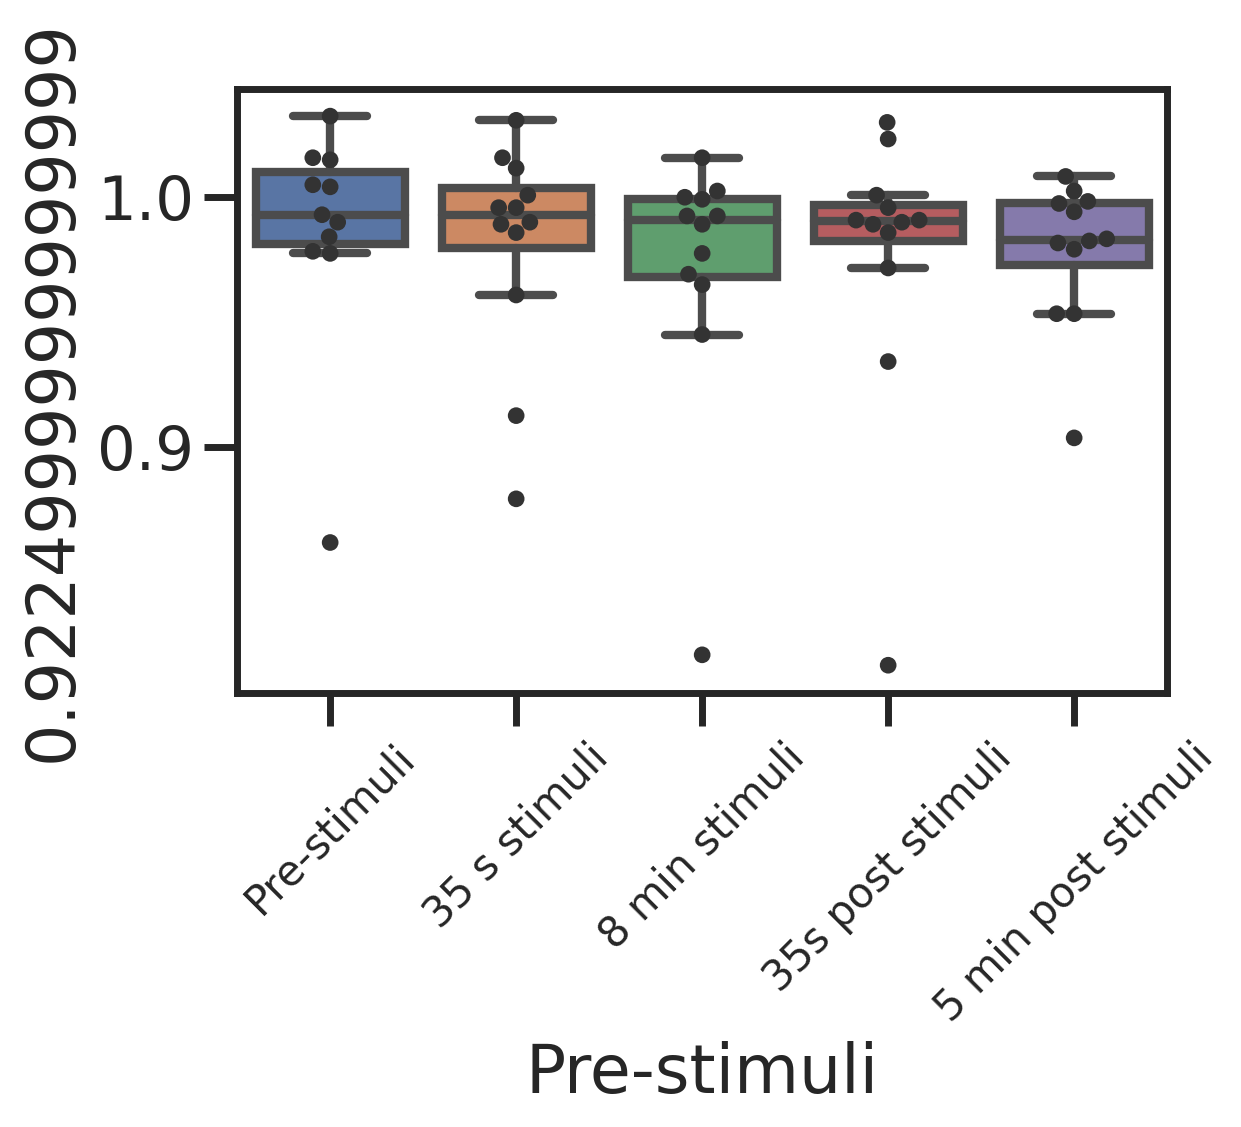

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
for datos in sheet_to_df_map:
  df=sheet_to_df_map[datos]
  plt.figure(figsize=(6, 4), dpi=200)# tamaño de la grafica en pulgadas y resolucion
  sns.set(font_scale=1.8)# fondo de la grafica
  sns.set_context("poster")
  sns.set_style(style="ticks")
  ax = sns.boxplot(x=df.columns[1], y=df.columns[0], data=df, showfliers = False)
  ax = sns.swarmplot(x=df.columns[1], y=df.columns[0], data=df, color="0.2", size=6)
  if (df[df.columns[0]]<0).sum() > (df[df.columns[0]]>0).sum():
    ax.invert_yaxis()
  ax.set_xticklabels(rotation=45,labels=df[df.columns[1]].unique())# este codigo sirve para rotar los nombres de cada grupo en el eje X
  plt.xticks(fontsize= 15)
  #order=df.Grupo.unique()
  #cad=[]
  #for i in range(0,len(df[df.columns[1]].unique())):
    #for j in range(i,len(df[df.columns[1]].unique())):
      #if i!=j :
        #cad.append((order[i] ,order[j]))
  #add_stat_annotation(ax, data=df, x="Grupo", y=df.columns[0], order=df.Grupo.unique(),
                    #box_pairs=cad,
                    #test='Mann-Whitney', text_format='star', loc='outside', verbose=2) #todo este codigo es para hacer un analisis estadistico (mann whiteny) y agregara asteriscos en los grupos que se comparen y ns en los que no sean significativos

  #plt.title(datos, fontsize=22, weight='bold', color="0.1")# este es para agregar titulos a la grafica

  plt.show()
  #fig = ax.get_figure()
  #fig.savefig( datos + ".png")
  #files.download(datos + ".png")# todo este codigo es para que baje todas las graficas que hiciste en formato png, puedes cambiar el formato
